# Loan Application Status Prediction
### Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 



### Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
df=pd.read_csv('loan_prediction.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])
df.head()

No of Rows: 614
No. of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#Statistic Analysis
#Let's check the duplicate values
df.duplicated().sum()

0

There is no duplicate value in this dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here we have total 614 rows with 13 columns

This dataset has ApplicantIncome is an integer column also thsi dataset has float and object data type too.

Target column Loan_Status is also in object datatype


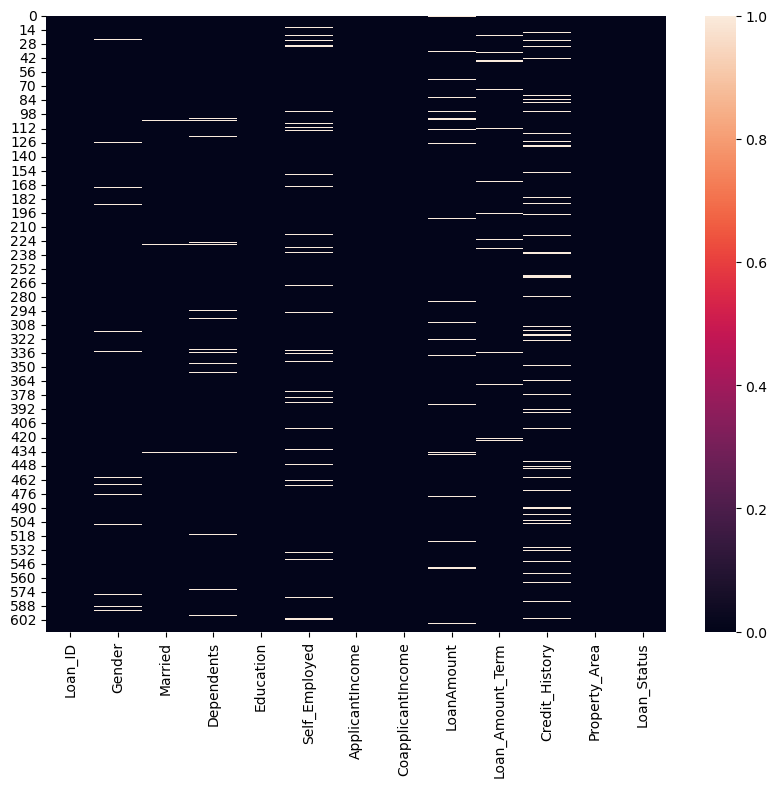

In [8]:
# Missing value check
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.show()

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
missing_values = df.isnull().sum().sort_values(ascending =True)
percentage = (missing_values/len(df))*100
pd.concat([missing_values,percentage],axis = 1 ,keys = ["missing values","Percentage of the missing values %"])

,missing values,Percentage of the missing values %
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
Property_Area,0,0.000000
Loan_Status,0,0.000000
Married,3,0.488599
Gender,13,2.117264
Loan_Amount_Term,14,2.280130
Dependents,15,2.442997


7 out 13 columns contains missing value.

In [11]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)
    print("\n")

Gender
Male      489
Female    112
Name: Gender, dtype: int64


Married
Yes    398
No     213
Name: Married, dtype: int64


Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64


Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64




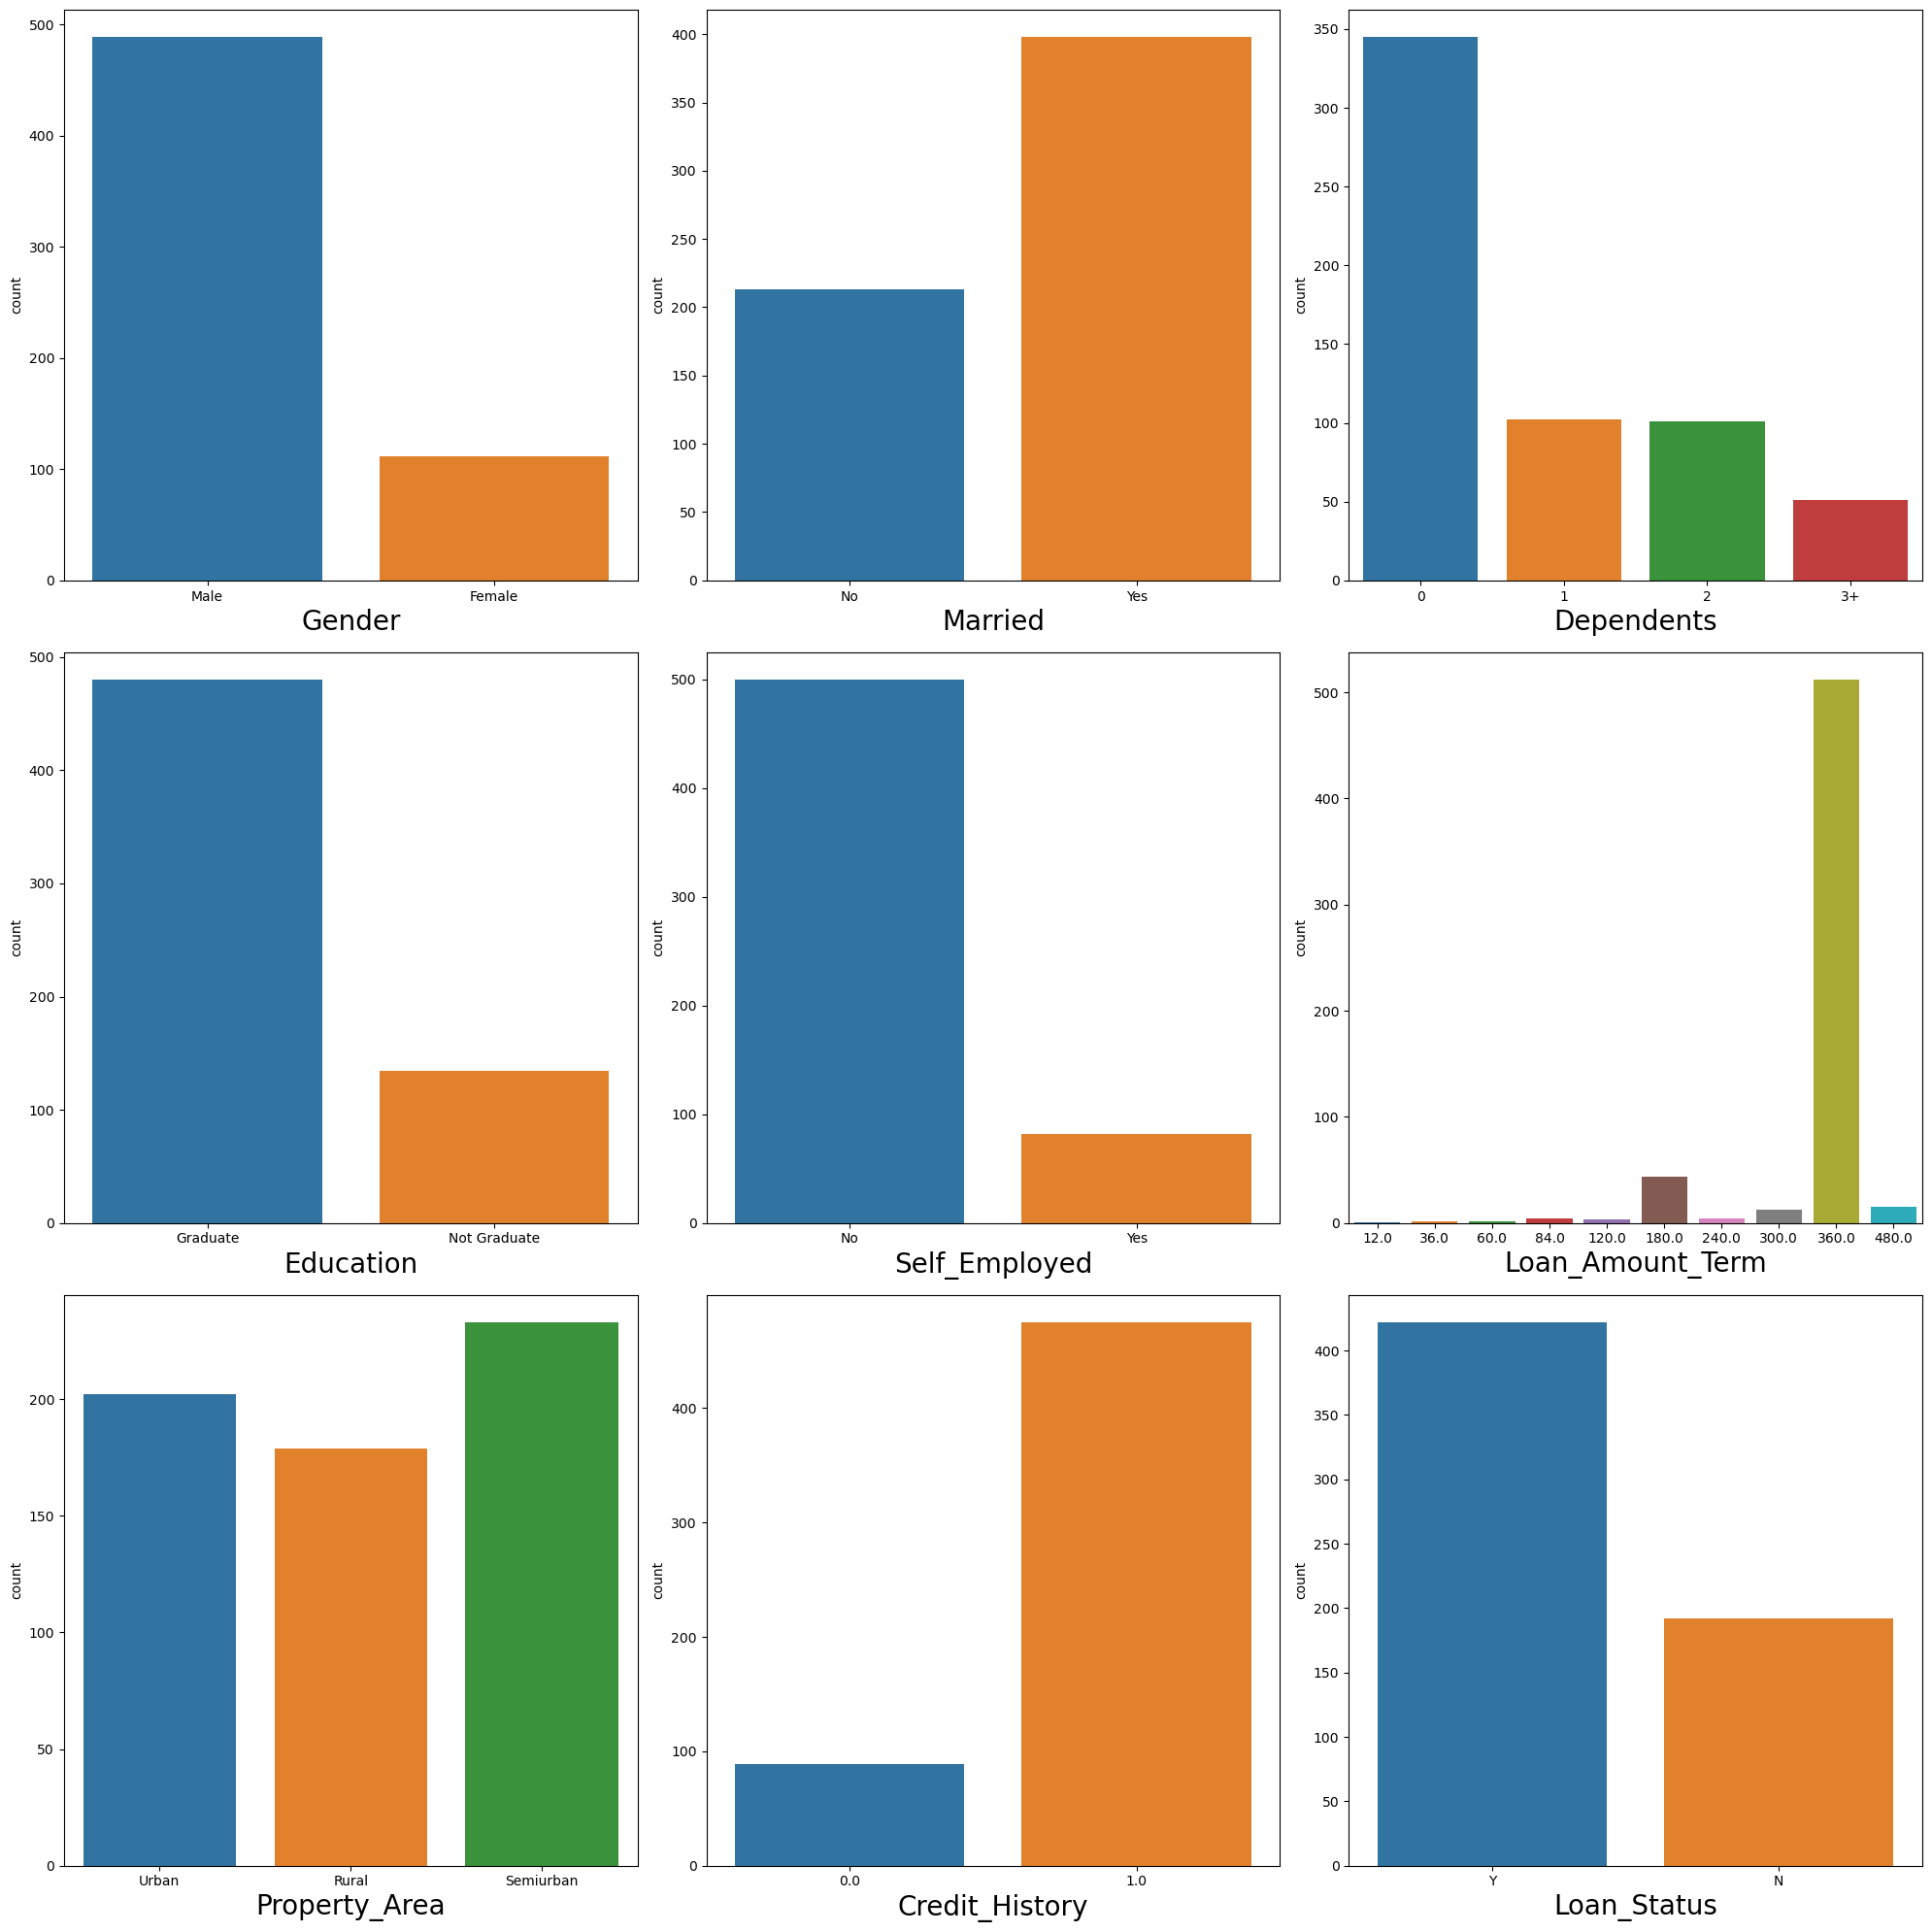

In [12]:
plt.figure(figsize=(20,20))
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize = 20)
    plotnumber+=1
plt.tight_layout()
plt.show()

The number of male applicants are more.

Self employed applicants are less.

Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.

Approximately 60% to 70% applications are approved.

Text(0, 0.5, 'Loan Amount')

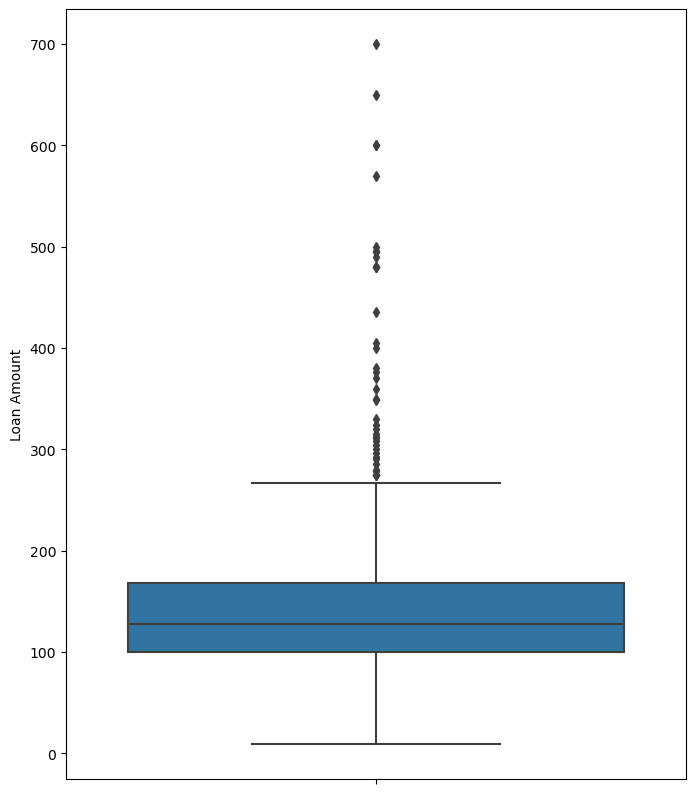

In [13]:
plt.figure(figsize=(8,10))
sns.boxplot( y='LoanAmount', data=df)
plt.ylabel('Loan Amount')


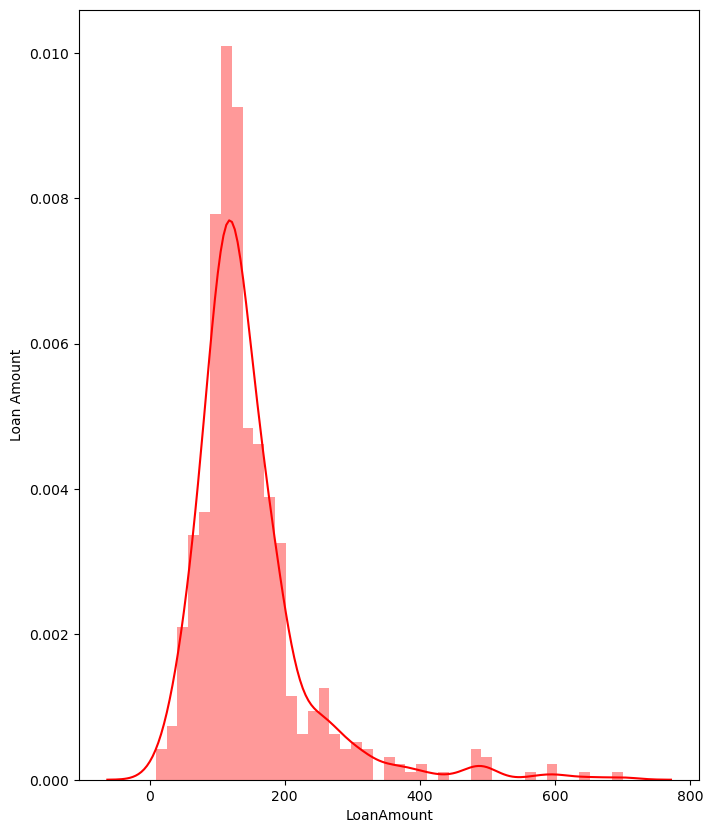

In [14]:
plt.figure(figsize = (8,10))
sns.distplot(df['LoanAmount'],color = "r")
plt.ylabel('Loan Amount')
plt.show()

In [15]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


The mean is greater than median loan amount.
Clearly we can see outliers in boxplot.

In [16]:
# Handling missing data in categirical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Handling missing data in Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# describing the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed

Minimum Term for Loan is 12 Months and Maximum Loan term is 480 Months.

Minimum Applicant income is 150 and maximum is 81000.

In [19]:
def loancomp(feature):
    plt.title(feature, fontsize=20)
    sns.countplot(feature,hue="Loan_Status",data=df)
    plt.title(feature +'vs Loan Status')
    plt.xlabel("Loan Status")
    plt.show()
    print("\n")
    print(pd.crosstab(df[feature],df["Loan_Status"], margins=True))

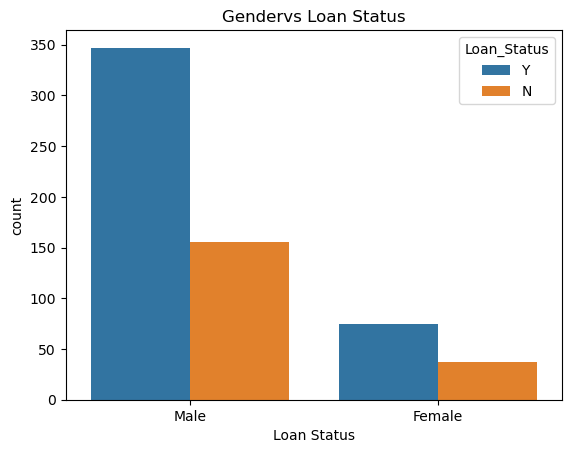



Loan_Status    N    Y  All
Gender                    
Female        37   75  112
Male         155  347  502
All          192  422  614


In [20]:
loancomp("Gender")

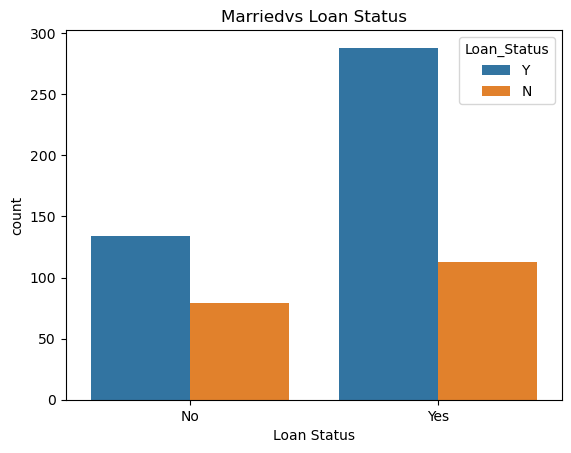



Loan_Status    N    Y  All
Married                   
No            79  134  213
Yes          113  288  401
All          192  422  614


In [21]:
loancomp("Married")

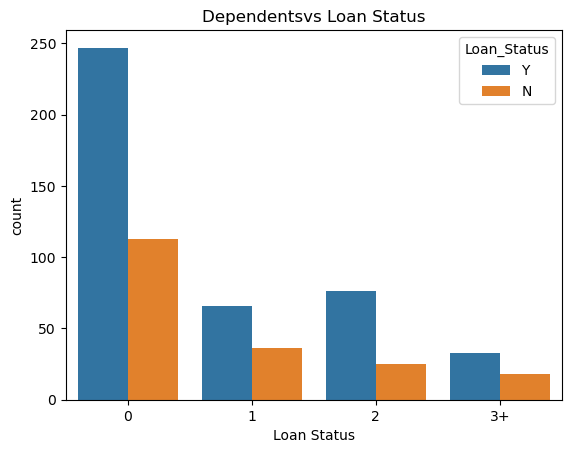



Loan_Status    N    Y  All
Dependents                
0            113  247  360
1             36   66  102
2             25   76  101
3+            18   33   51
All          192  422  614


In [22]:
loancomp("Dependents")

Female having zero dependents have more chances to get loan approval compare to Females with dependents.

For male Maximum loan approval comes with 0 dependents followed by 2 dependent

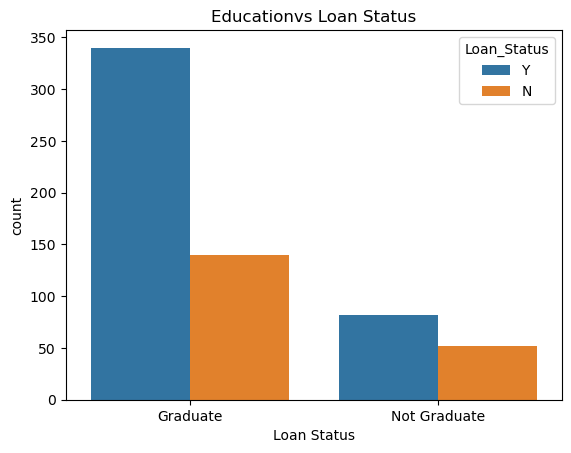



Loan_Status     N    Y  All
Education                  
Graduate      140  340  480
Not Graduate   52   82  134
All           192  422  614


In [23]:
loancomp("Education")

Graduate applicants are more likely to get loan approval irrespective gender

In [24]:
# Encoding categorical data
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [25]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [26]:
# Outliers Detection and Removal
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

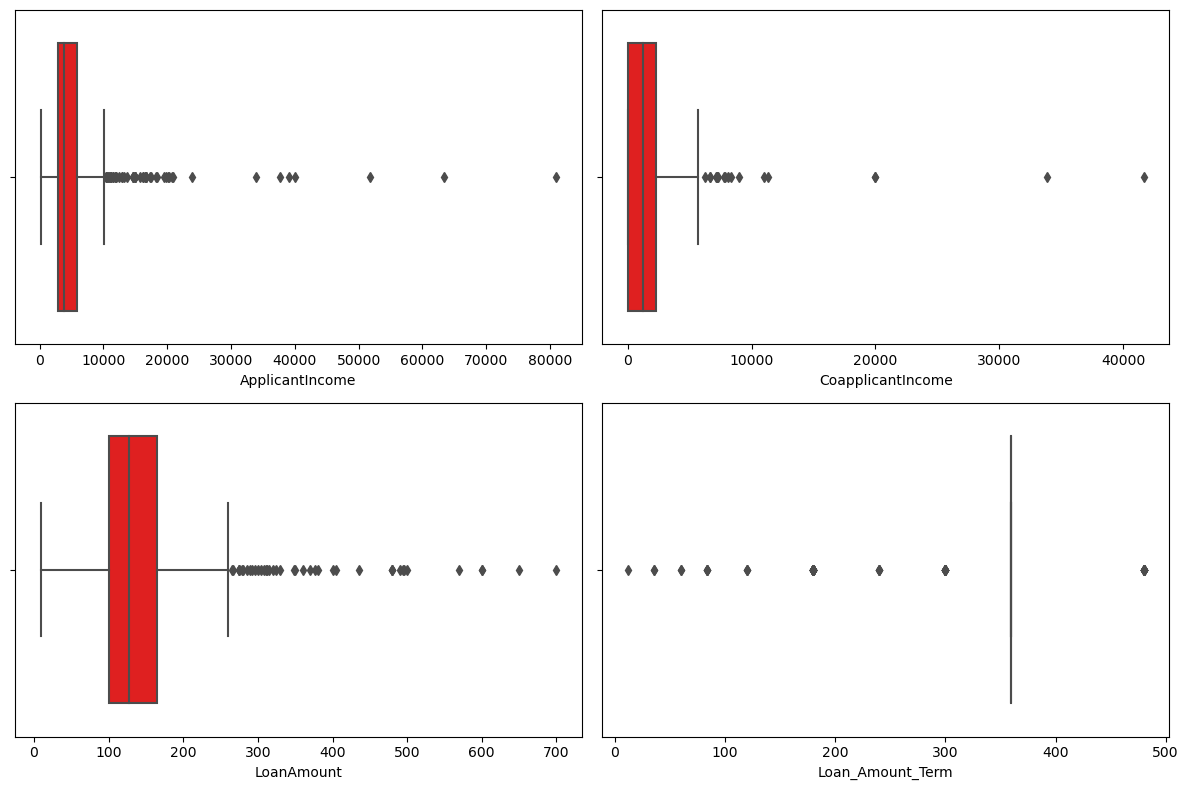

In [27]:
plt.figure(figsize=(12,8))
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [28]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [29]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


In [30]:
print('Percentage Data Loss :',((614-577)/614)*100,'%')


Percentage Data Loss : 6.026058631921824 %


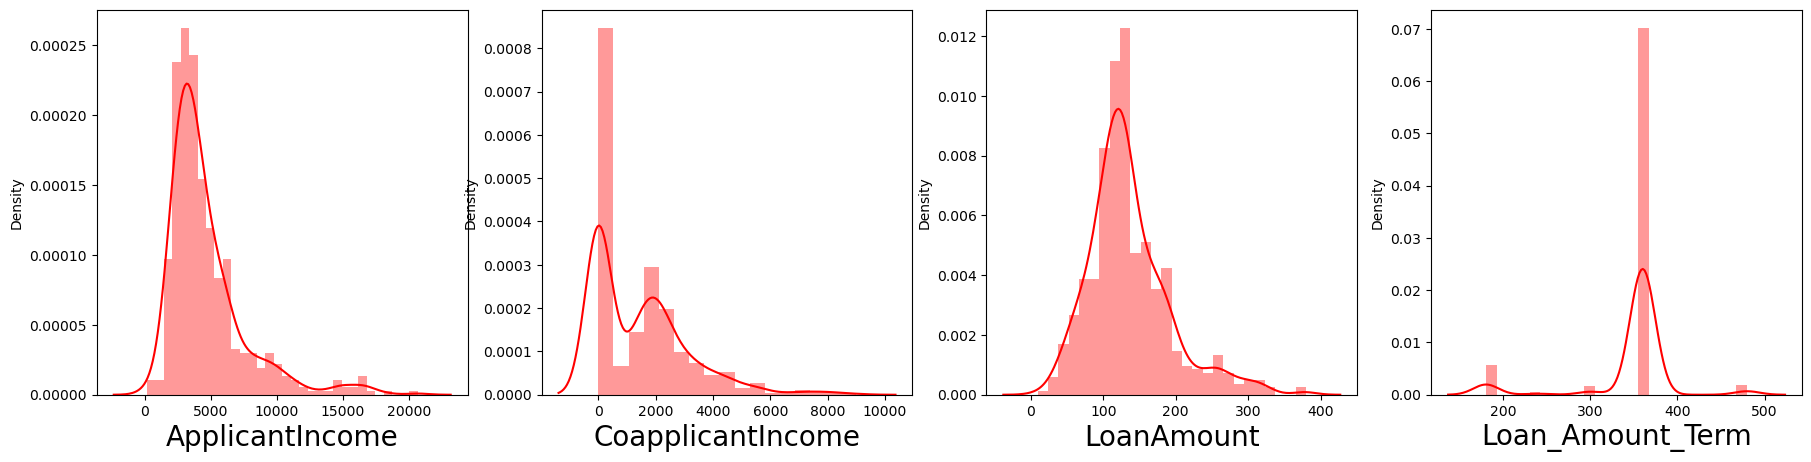

In [31]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [32]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.

Other features are categorical in nature so skewness is nothing to do with these remaining feature.We will ignore them.

In [33]:
# Removing skewnes
s_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
from scipy.stats import boxcox
for i in s_col:
    df[i] =boxcox(df[i],.5)

In [34]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [35]:
# Correlation 
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.043888,0.223579,0.169132,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.015274,0.301532,0.178289,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.095908,-0.015384,0.133323,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.177608,0.010786,-0.135408,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.238668,-0.068739,0.118771,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.043888,-0.015274,0.095908,-0.177608,0.238668,1.000000,-0.317194,0.447455,-0.061761,0.035231,-0.010953,-0.005287
CoapplicantIncome,0.223579,0.301532,-0.015384,0.010786,-0.068739,-0.317194,1.000000,0.256937,-0.025922,-0.002648,-0.087549,0.064145
LoanAmount,0.169132,0.178289,0.133323,-0.135408,0.118771,0.447455,0.256937,1.000000,0.046741,0.000282,-0.093267,-0.025614
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.061761,-0.025922,0.046741,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.035231,-0.002648,0.000282,0.027392,1.000000,-0.008121,0.560936


<AxesSubplot:>

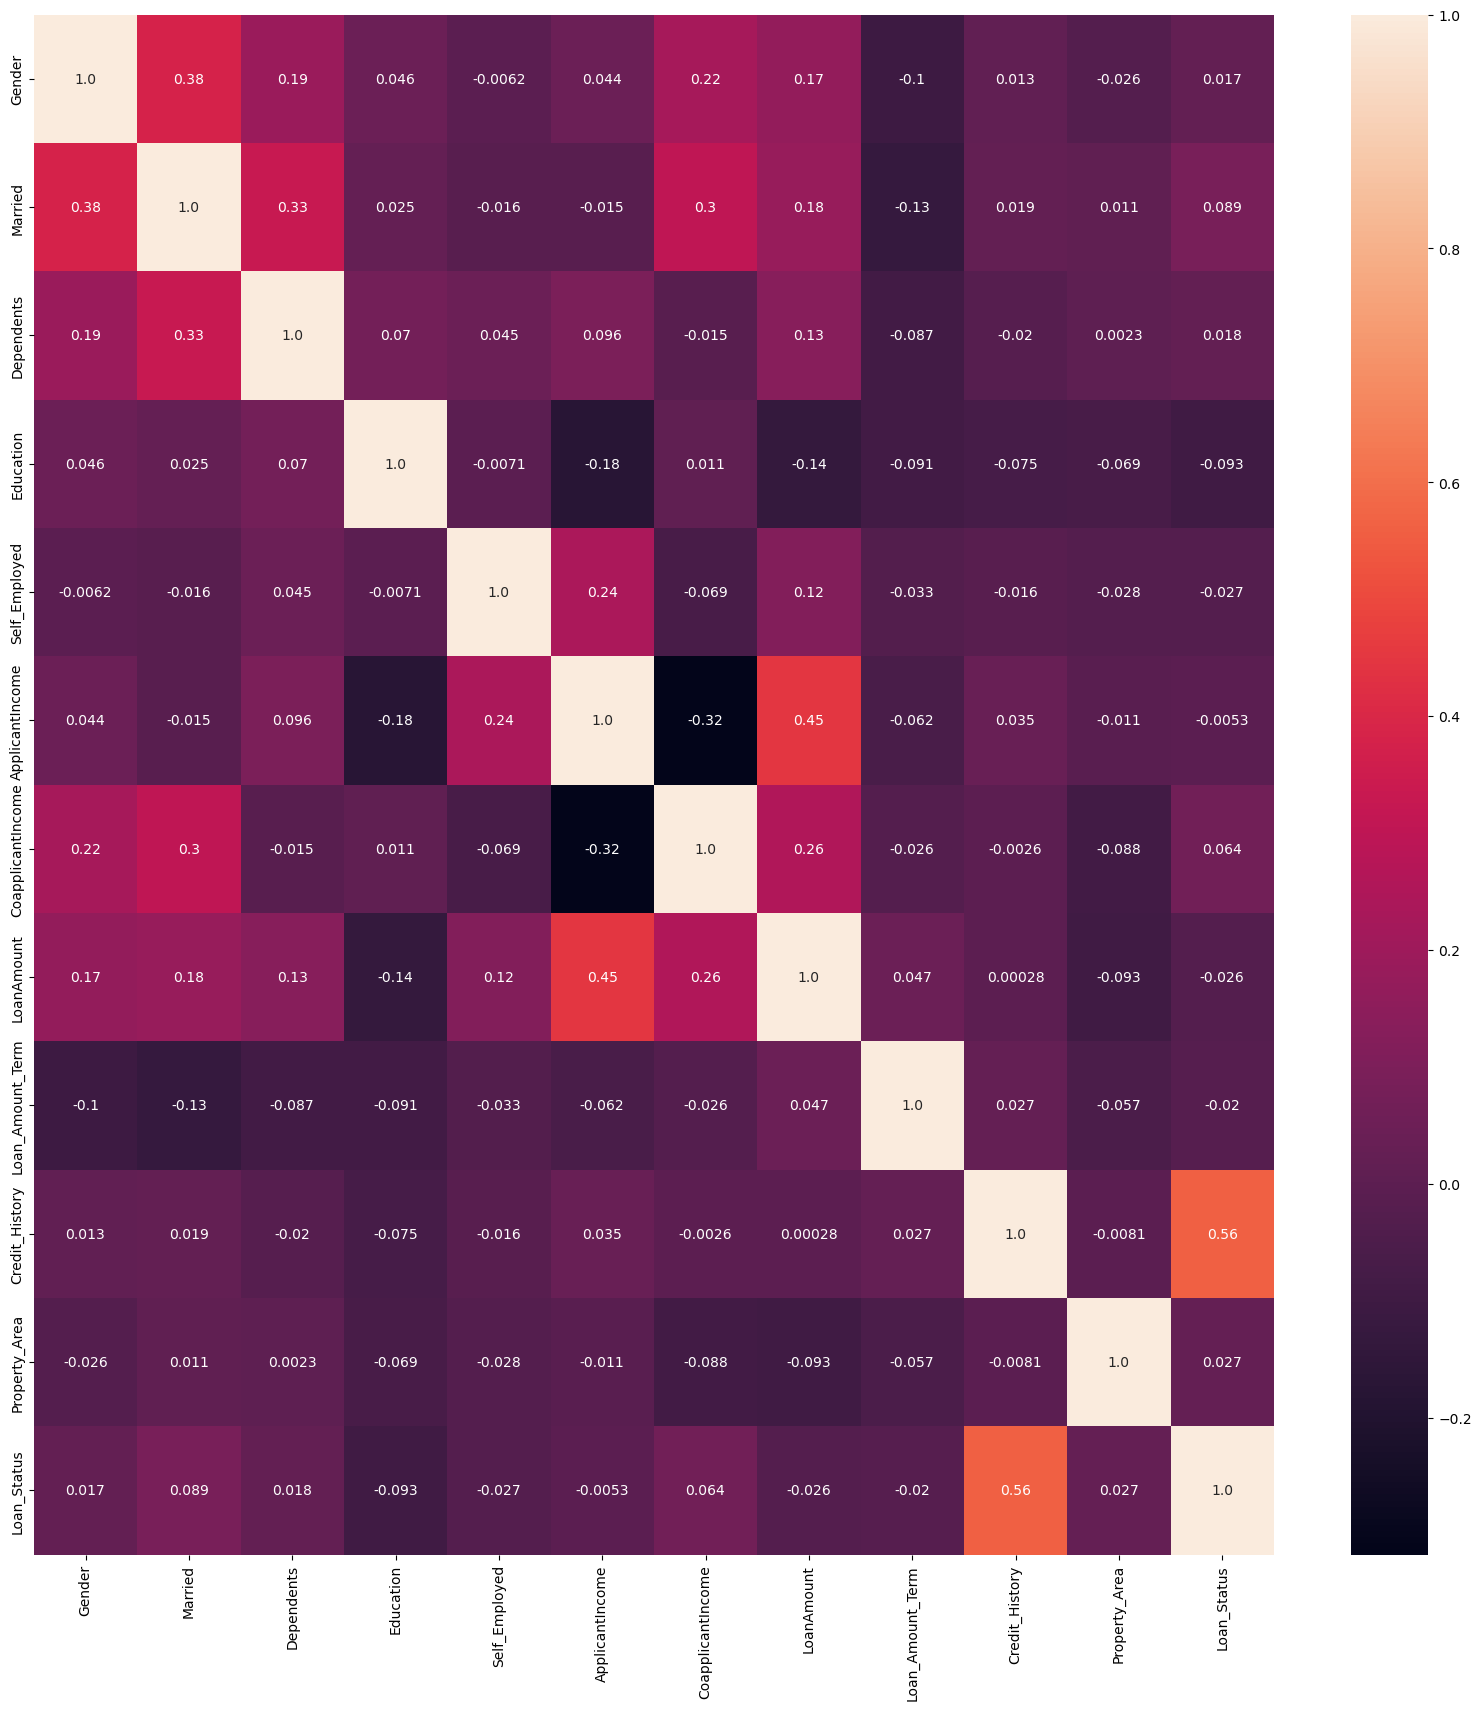

In [38]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot= True,fmt = ".2")

Maximum correlation of 0.56 exist between Credit History and Loan status.

In [39]:
# Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.393360,Gender
1,3.960544,Married
2,1.789084,Dependents
3,1.309434,Education
4,1.218390,Self_Employed
5,20.985845,ApplicantIncome
6,3.190525,CoapplicantIncome
7,33.463196,LoanAmount
8,20.180914,Loan_Amount_Term
9,9.621274,Credit_History


In [40]:
from imblearn.over_sampling import SMOTE
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [41]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [42]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


In [49]:
from sklearn.metrics import roc_curve


In [52]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('Classification ML Algorithm Evaluation Matrix',m,'is')
    print('\n')
    print('Accuracy Score :', accuracy_score(Y_test, y_pred))
    print('\n')
    print('Confusion matrix :',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('Classification Report :',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score : 0.7573221757322176


Confusion matrix : [[ 75  44]
 [ 14 106]]


Classification Report :               precision    recall  f1-score   support

           0       0.84      0.63      0.72       119
           1       0.71      0.88      0.79       120

    accuracy                           0.76       239
   macro avg       0.77      0.76      0.75       239
weighted avg       0.77      0.76      0.75       239



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score : 0.7615062761506276


Confusion matrix : [[ 73  46]
 [ 11 109]]


Classification Report :               precision    recall  f1-score   support

           0       0.87      0.61      0.72       119
           1       0.70      0.91      0.79       120

    accuracy                           0.76       239
   macro avg       0.79      0.76      0.76       239
weighted avg       0.79      0.76      0.76       239



C

In [53]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation Score', m, ':')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :
Score : [0.7        0.74213836 0.77987421 0.8427673  0.8490566 ]
Mean Score : 0.7827672955974844
Std deviation : 0.05745220194291149




Cross Validation Score SVC() :
Score : [0.7        0.72955975 0.81132075 0.81761006 0.87421384]
Mean Score : 0.7865408805031446
Std deviation : 0.06324880533363676




Cross Validation Score GaussianNB() :
Score : [0.68125    0.71069182 0.7672956  0.79874214 0.77358491]
Mean Score : 0.7463128930817611
Std deviation : 0.04343938982293329




Cross Validation Score DecisionTreeClassifier() :
Score : [0.74375    0.66037736 0.81761006 0.79245283 0.8490566 ]
Mean Score : 0.7726493710691825
Std deviation : 0.06586635631120527




Cross Validation Score KNeighborsClassifier() :
Score : [0.68125    0.69811321 0.7672956  0.80503145 0.76100629]
Mean Score : 0.7425393081761006
Std deviation : 0.04602005720040399




Cross Validation Score RandomForestClassifier() :
Score : [0.75       0.7672956  0.87421384 0.861635

In [54]:
# Hyper Parameter Tuning : GridSearchCV
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}


In [55]:
GCV = GridSearchCV(RandomForestClassifier(),parameter)
GCV.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]})

In [56]:
GCV.best_params_


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 15}

In [59]:
# Final Model
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 15, max_depth=60 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Accuracy Score : 0.8284518828451883


In [61]:
# Saving the model
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']